In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
from pandas.io.json import json_normalize

plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [3]:

# 创建连接 pandas能很便捷的读取SQL
db = pymysql.connect(host='127.0.0.1', port=3306, user='root', passwd='usbw', db='lianjia', charset='utf8')
# 创建游标
sql_cmd = "SELECT * FROM zufang"
data = pd.read_sql(sql_cmd, db)

#data = json_normalize([comment for comment in mon_data])  
data.head()

,bedroom_num,hall_num,bathroom_num,rent_area,house_title,resblock_name,bizcircle_name,layout,rent_price_listing,house_tag,frame_orientation,m_url,rent_price_unit,latitude,longitude,distance,city,dist,type
0,2,2,1,91,整租·新城金郡南区二期 2室2厅 南,新城金郡南区二期,城南,2室2厅1卫,1400,新上,南,https://m.lianjia.com/chuzu/su/zufang/SU232075...,元/月,31.221765,120.630177,NaN,苏州,吴中,整租
1,1,1,1,45,独栋·职业房东 旺吴路50号公寓 经济适用房 1室1厅,,城南,1室1厅1卫,1650,独栋公寓 拎包入住 有阳台 开放厨房 押一付一,北,https://m.lianjia.com/chuzu/su/apartment/layou...,元/月,31.262788,120.611977,NaN,苏州,吴中,整租
2,1,1,1,10,整租·越湖家天下 1室1厅 北,越湖家天下,城南,1室1厅1卫,650,None,北,https://m.lianjia.com/chuzu/su/zufang/SU220792...,元/月,31.232596,120.630047,NaN,苏州,吴中,整租
3,1,1,1,45,独栋·职业房东 旺吴路50号公寓 朝南温馨房 1室1厅,,城南,1室1厅1卫,1750,独栋公寓 月租 开放厨房 押一付一,南 北,https://m.lianjia.com/chuzu/su/apartment/layou...,元/月,31.262788,120.611977,NaN,苏州,吴中,整租
4,1,1,1,15,整租·小石城8区梧桐园 1室1厅 南/北,小石城8区梧桐园,城南,1室1厅1卫,850,None,南 北,https://m.lianjia.com/chuzu/su/zufang/SU228625...,元/月,31.224357,120.623396,NaN,苏州,吴中,整租


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92531 entries, 0 to 92530
Data columns (total 19 columns):
bedroom_num           92531 non-null int64
hall_num              92531 non-null int64
bathroom_num          92531 non-null int64
rent_area             92531 non-null int64
house_title           92531 non-null object
resblock_name         92531 non-null object
bizcircle_name        92531 non-null object
layout                92531 non-null object
rent_price_listing    92531 non-null int64
house_tag             65114 non-null object
frame_orientation     92531 non-null object
m_url                 92531 non-null object
rent_price_unit       92531 non-null object
latitude              92529 non-null float64
longitude             92529 non-null float64
distance              39632 non-null float64
city                  92531 non-null object
dist                  92531 non-null object
type                  92531 non-null object
dtypes: float64(3), int64(5), object(11)
memory usage: 13

In [5]:
# 每个城市各采样3000条数据，保存为csv文件
data_sample = pd.concat([data[data['city']==city].sample(3000) for city in ['南京', '苏州', '无锡', '常州']])
data_sample.to_csv('data_sample.csv', index=False)

In [6]:
# 2. bathroom_num
data['bathroom_num'].unique()

array([1, 0, 2, 3, 4, 7, 5, 6, 9], dtype=int64)

In [7]:
data[data['bathroom_num'].isin(['7','9'])]

,bedroom_num,hall_num,bathroom_num,rent_area,house_title,resblock_name,bizcircle_name,layout,rent_price_listing,house_tag,frame_orientation,m_url,rent_price_unit,latitude,longitude,distance,city,dist,type
360,5,3,7,537,整租·中海独墅岛 5室3厅 南,中海独墅岛,郭巷,5室3厅7卫,50000,None,南,https://m.lianjia.com/chuzu/su/zufang/SU231146...,元/月,31.274780,120.695984,NaN,苏州,吴中,整租
3152,7,7,7,240,整租·金城花园(昆山) 7室7厅 南,金城花园(昆山),花桥,7室7厅7卫,950,新上,南,https://m.lianjia.com/chuzu/su/zufang/SU232443...,元/月,31.305953,121.081230,NaN,苏州,昆山,整租
7978,4,3,7,408,整租·中海国际社区（二区） 4室3厅 南,中海国际社区（二区）,湖东,4室3厅7卫,15000,None,南,https://m.lianjia.com/chuzu/su/zufang/SU225339...,元/月,31.321692,120.755787,NaN,苏州,工业园区,整租
19209,7,0,7,220,整租·复地御钟山二期 7室0厅 南/北,复地御钟山二期,马群,7室0厅7卫,9000,近地铁,南 北,https://m.lianjia.com/chuzu/nj/zufang/NJ222888...,元/月,32.058808,118.898702,307.0,南京,玄武,整租
21573,9,1,9,310,整租·万科九都荟 9室1厅 南,万科九都荟,岔路口,9室1厅9卫,32000,None,南,https://m.lianjia.com/chuzu/nj/zufang/NJ225852...,元/月,31.976105,118.812428,550.0,南京,雨花台,整租
25227,7,0,7,220,整租·复地御钟山二期 7室0厅 南/北,复地御钟山二期,马群,7室0厅7卫,9000,近地铁,南 北,https://m.lianjia.com/chuzu/nj/zufang/NJ222888...,元/月,32.058808,118.898702,307.0,南京,栖霞,整租
32427,9,1,9,310,整租·万科九都荟 9室1厅 南,万科九都荟,岔路口,9室1厅9卫,32000,None,南,https://m.lianjia.com/chuzu/nj/zufang/NJ225852...,元/月,31.976105,118.812428,550.0,南京,江宁,整租
52828,9,9,9,600,整租·荣巷东浜 9室9厅 南,荣巷东浜,荣巷,9室9厅9卫,19000,None,南,https://m.lianjia.com/chuzu/wx/zufang/WX229828...,元/月,31.562389,120.250270,NaN,无锡,滨湖,整租


In [8]:
# 除了55273行是异常数据外，其它数据都正常
data = data.drop([52828])
data = data.drop([21573])
data = data.drop([32427])
data = data.drop([3152])

In [9]:
# data.duplicated() 看重复行，True为重复
# data.drop_duplicates().reset_index(drop=True)
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated() 

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
88138    False
88139    False
88140    False
88141    False
88142    False
88143    False
88144    False
88145    False
88146    False
88147    False
88148    False
88149    False
88150    False
88151    False
88152    False
88153    False
88154    False
88155    False
88156    False
88157    False
88158    False
88159    False
88160    False
88161    False
88162    False
88163    False
88164    False
88165    False
88166    False
88167    False
Length: 88168, dtype: bool

In [10]:
# 3. bedroom_num
data['bedroom_num'].unique()

array([ 2,  1,  3,  4,  6,  5,  8,  0,  9,  7, 11, 10, 12, 15, 16],
      dtype=int64)

In [11]:
# 没有异常数据，只是很多10室以上都是专门用来合租的
data[data['bedroom_num'].isin(['9','10','11','12','15','16'])]

,bedroom_num,hall_num,bathroom_num,rent_area,house_title,resblock_name,bizcircle_name,layout,rent_price_listing,house_tag,frame_orientation,m_url,rent_price_unit,latitude,longitude,distance,city,dist,type
439,9,3,5,305,整租·衡园 9室3厅 南,衡园,光福,9室3厅5卫,3000,None,南,https://m.lianjia.com/chuzu/su/zufang/SU223024...,元/月,31.303358,120.403184,NaN,苏州,吴中,整租
4045,11,2,4,400,整租·大渔新村 11室2厅 南,大渔新村,玉山,11室2厅4卫,6000,None,南,https://m.lianjia.com/chuzu/su/zufang/SU230431...,元/月,31.420396,120.918617,NaN,苏州,昆山,整租
4049,10,4,3,400,整租·大渔新村 10室4厅 南,大渔新村,玉山,10室4厅3卫,4200,None,南,https://m.lianjia.com/chuzu/su/zufang/SU230796...,元/月,31.420396,120.918617,NaN,苏州,昆山,整租
7042,9,2,2,225,整租·君地新大陆 9室2厅 东,君地新大陆,青剑湖,9室2厅2卫,10000,双卫生间,东,https://m.lianjia.com/chuzu/su/zufang/SU229463...,元/月,31.367719,120.720259,NaN,苏州,工业园区,整租
11849,9,5,4,369,整租·紫檀雅居 9室5厅 南/北,紫檀雅居,兴隆大街,9室5厅4卫,40000,近地铁,南 北,https://m.lianjia.com/chuzu/nj/zufang/NJ207072...,元/月,32.018061,118.737385,791.0,南京,建业,整租
12140,11,1,3,240,整租·兴达新寓二村 11室1厅 南/北,兴达新寓二村,应天西路,11室1厅3卫,5000,近地铁,南 北,https://m.lianjia.com/chuzu/nj/zufang/NJ229056...,元/月,32.022746,118.749424,730.0,南京,建业,整租
12450,9,4,4,611,整租·雅居乐长乐渡 9室4厅 南/北,雅居乐长乐渡,长乐路,9室4厅4卫,68000,None,南 北,https://m.lianjia.com/chuzu/nj/zufang/NJ224863...,元/月,32.019835,118.791830,189.0,南京,秦淮,整租
17415,9,4,4,350,整租·半山花园 9室4厅 南,半山花园,后宰门,9室4厅4卫,13000,近地铁,南,https://m.lianjia.com/chuzu/nj/zufang/NJ230709...,元/月,32.047411,118.833152,702.0,南京,玄武,整租
22557,10,1,1,703,整租·绿地之窗 10室1厅 东,绿地之窗,宁南,10室1厅1卫,75900,新上,东,https://m.lianjia.com/chuzu/nj/zufang/NJ232231...,元/月,31.976929,118.799341,364.0,南京,雨花台,整租
25965,9,2,1,141,整租·锦绣花园金桂园 9室2厅 南/北,锦绣花园金桂园,麒麟镇,9室2厅1卫,3000,None,南 北,https://m.lianjia.com/chuzu/nj/zufang/NJ210419...,元/月,32.062245,118.941312,NaN,南京,栖霞,整租


In [12]:
#有的面积几十平，却有10个以上房间，去除
data = data.drop([41811])
data = data.drop([60447])

In [13]:
# 4. orientation
data['frame_orientation'].unique()  # 这个数据太乱了，要用的时候再处理吧

array(['南', '北', '南 北', ' 东 东北', ' 东', '东 南 北 东北', '西', '西南',
       '东 南 西 北 东北', '东南', '东 东南 南 西南 西 西北 北 东北', '东', '东 南', '东北',
       '南 西 北', '南 西', '东 南 西 北', '', '北 东北', ' 西', ' 南', '东南 西',
       '东南 南 西南', '东 东南', '东南 西南 北', '东 南 西南 西', '东 西', '西北', '东南 南',
       ' 东北', '南 西北', ' 北', '南 西南 北', '东 西 北', '西 北', ' 南 北', '南 东北',
       '东 北', '东南 西南 西北', '未知', '南 西南', '西北 北', '东 南 北', '东 东北',
       '西南 西北 北', '东南 西北', '西 西北 北 东北', '东南 北', '西南 西北', '东 东南 南', '西南 西',
       '南 西南 西', '东 南 西南', '西南 北', '东南 西南', '南 西南 东北', ' 东南', '南 西南 西北',
       '东南 南 北', '东 东南 南 西南 西', ' 东 东南', ' 东 南', '东 东南 南 西南', '东南 东北',
       '南 北 东北', ' 西北', '东 南 西', ' 西 西北', '东 南 西南 西北', '西 西北', '东 东南 西南',
       '西 西北 北', '西北 东北', '东 东南 南 西 北', '东 东南 南 西南 西 西北 北', ' 西南',
       ' 东南 南', ' 东南 南 北', '东南 西 北', '东 东南 南 西南 北', '东 北 东北', ' 南 北 东北',
       '东 东南 南 西 东北', '东 西南 西', '东 东南 西北 东北', '东 东南 西南 西 西北 北 东北',
       '东 东南 南 西南 西 东北', '东 东南 南 西南 西 西北 东北', '东 东南 南 东北', '东南 西南 西北 东北',
       '东南 南 西南 西 西北 北 东北

In [14]:
# 5. hall_num
data['hall_num'].unique()

array([2, 1, 0, 3, 4, 5, 6, 8], dtype=int64)

In [15]:
data[data['hall_num'].isin(['6','7','8'])]

,bedroom_num,hall_num,bathroom_num,rent_area,house_title,resblock_name,bizcircle_name,layout,rent_price_listing,house_tag,frame_orientation,m_url,rent_price_unit,latitude,longitude,distance,city,dist,type
18838,6,6,5,400,整租·钟山美庐 6室6厅 南,钟山美庐,马群,6室6厅5卫,35000,None,南,https://m.lianjia.com/chuzu/nj/zufang/NJ223091...,元/月,32.071459,118.919470,956.0,南京,玄武,整租
24797,6,6,5,400,整租·钟山美庐 6室6厅 南,钟山美庐,马群,6室6厅5卫,35000,None,南,https://m.lianjia.com/chuzu/nj/zufang/NJ223091...,元/月,32.071459,118.919470,956.0,南京,栖霞,整租
28477,5,6,1,300,整租·依云溪谷一期 5室6厅 南,依云溪谷一期,仙林,5室6厅1卫,25000,近地铁,南,https://m.lianjia.com/chuzu/nj/zufang/NJ229489...,元/月,32.095683,118.928929,366.0,南京,栖霞,整租
35200,4,6,4,270,整租·帝景天誉别墅 4室6厅 南/北,帝景天誉别墅,江宁其它,4室6厅4卫,6500,近地铁 随时看房,南 北,https://m.lianjia.com/chuzu/nj/zufang/NJ219397...,元/月,31.873776,118.839452,50.0,南京,江宁,整租
42686,8,8,1,693,整租·绿城玫瑰园 8室8厅 南/北,绿城玫瑰园,浦口其它,8室8厅1卫,55000,None,南 北,https://m.lianjia.com/chuzu/nj/zufang/NJ212070...,元/月,32.135159,118.676607,NaN,南京,浦口,整租
62026,9,6,2,260,整租·景瑞英郡花苑 9室6厅 南,景瑞英郡花苑,北港,9室6厅2卫,3000,双卫生间,南,https://m.lianjia.com/chuzu/changzhou/zufang/C...,元/月,31.809103,119.899864,NaN,常州,钟楼区,整租
79704,6,6,0,200,整租·乐嘉汇商务广场 6室6厅 西/西北/北,乐嘉汇商务广场,狮山,6室6厅0卫,14000,近地铁,西 西北 北,https://m.lianjia.com/chuzu/su/zufang/SU228195...,元/月,31.303170,120.576754,756.0,苏州,高新,整租
80807,6,6,0,295,整租·虎踞路77号 6室6厅 南,虎踞路77号,凤凰西街,6室6厅0卫,17000,近地铁,南,https://m.lianjia.com/chuzu/nj/zufang/NJ205635...,元/月,32.053248,118.765037,1058.0,南京,鼓楼,整租


In [16]:
# 3088行是异常数据，删去
data = data.drop([3088])

In [17]:
# 6. rent_area
data.sample(5)['rent_area']

49969    108
37920     75
76208     20
70898     15
83469    132
Name: rent_area, dtype: int64

In [18]:
# rent_area字段有些填写的是一个范围，比如23-25平房米，后期转换成“float”类型的时候不好转换，考虑取平均值
def get_aver(data):
    if isinstance(data, str) and '-' in data:
        low, high = data.split('-')
        return (int(low)+int(high))/2
    else:
        return int(data)


data['rent_area'] = data['rent_area'].apply(get_aver)

In [19]:
data[data['rent_area'] < 10]

,bedroom_num,hall_num,bathroom_num,rent_area,house_title,resblock_name,bizcircle_name,layout,rent_price_listing,house_tag,frame_orientation,m_url,rent_price_unit,latitude,longitude,distance,city,dist,type
493,1,0,0,8,整租·南山维拉 1室0厅 北,南山维拉,甪直,1室0厅0卫,600,None,北,https://m.lianjia.com/chuzu/su/zufang/SU231083...,元/月,31.284079,120.845091,NaN,苏州,吴中,整租
2025,1,0,0,8,整租·伟业迎春乐家 1室0厅 南,伟业迎春乐家,太湖新城（吴江）,1室0厅0卫,700,None,南,https://m.lianjia.com/chuzu/su/zufang/SU231804...,元/月,31.212704,120.661239,NaN,苏州,吴江,整租
3976,1,0,1,5,整租·建滔朗峰 1室0厅 东,建滔朗峰,玉山,1室0厅1卫,2800,新上,东,https://m.lianjia.com/chuzu/su/zufang/SU232003...,元/月,31.372449,120.985232,NaN,苏州,昆山,整租
5821,2,1,1,0,整租·晋合公寓 2室1厅 东南,晋合公寓,湖东CBD,2室1厅1卫,7500,近地铁 随时看房,东南,https://m.lianjia.com/chuzu/su/zufang/SU229849...,元/月,31.320223,120.728496,1133.0,苏州,工业园区,整租
7285,2,2,1,0,整租·星湖名轩 2室2厅 南,星湖名轩,斜塘,2室2厅1卫,3700,新上,南,https://m.lianjia.com/chuzu/su/zufang/SU232360...,元/月,31.289828,120.732232,NaN,苏州,工业园区,整租
10603,1,1,1,8,整租·康怡花园 1室1厅 北,康怡花园,江东,1室1厅1卫,1200,近地铁,北,https://m.lianjia.com/chuzu/nj/zufang/NJ224928...,元/月,32.044482,118.749377,562.0,南京,建业,整租
11013,1,1,1,8,整租·台园 1室1厅 南,台园,南苑,1室1厅1卫,1000,None,南,https://m.lianjia.com/chuzu/nj/zufang/NJ227967...,元/月,32.027452,118.765604,NaN,南京,建业,整租
11136,1,1,1,8,整租·开园 1室1厅 南,开园,南苑,1室1厅1卫,600,None,南,https://m.lianjia.com/chuzu/nj/zufang/NJ229322...,元/月,32.026000,118.760586,NaN,南京,建业,整租
13584,1,1,1,7,整租·钓鱼巷小区 1室1厅 北,钓鱼巷小区,建康路,1室1厅1卫,1500,近地铁,北,https://m.lianjia.com/chuzu/nj/zufang/NJ222602...,元/月,32.029461,118.803907,428.0,南京,秦淮,整租
13851,2,1,1,8,整租·康馨花园(秦淮) 2室1厅 南,康馨花园(秦淮),秦虹,2室1厅1卫,700,None,南,https://m.lianjia.com/chuzu/nj/zufang/NJ231727...,元/月,32.017945,118.815875,NaN,南京,秦淮,整租


In [20]:
# 房间只有1平米，是异常数据，删去
data = data.drop(data[data['rent_area'] < 10].index)

In [21]:
# 7. rent_price_unit
data['rent_price_unit'].unique()

array(['元/月'], dtype=object)

In [22]:
# 租金都是以“元/月”计算的，所以这一列没用了，可以删了
data = data.drop(columns='rent_price_unit')

In [23]:
# 8. rent_price_listing
#data['rent_price_listing'].astype(str)
# data[data['rent_price_listing'].str.contains('-')].sample(3)

In [24]:
# 价格是有区间的，需要按照处理rent_area一样的方法处理
data['rent_price_listing'] = data['rent_price_listing'].apply(get_aver)

In [25]:
# 数据类型转换
for col in ['bathroom_num', 'bedroom_num', 'hall_num', 'rent_price_listing']:
    data[col] = data[col].astype(int)

In [26]:
# 'distance', 'latitude', 'longitude'因为有None，需另外处理
def dw_None_dis(data):
    if data is None:
        return np.nan
    else:
        return float(data)
        #return int(data)

def dw_None_latlon(data):
    if data is None or data == '':
        return np.nan
    else:
        return float(data)            


data['distance'] = data['distance'].apply(dw_None_dis)
data['latitude'] = data['latitude'].apply(dw_None_latlon)
data['longitude'] = data['longitude'].apply(dw_None_latlon)

In [27]:
# 查看数据概况
data.sample(5)

,bedroom_num,hall_num,bathroom_num,rent_area,house_title,resblock_name,bizcircle_name,layout,rent_price_listing,house_tag,frame_orientation,m_url,latitude,longitude,distance,city,dist,type
30893,3,2,2,139,整租·颐秀居 3室2厅 南/北,颐秀居,百家湖,3室2厅2卫,5000,近地铁 双卫生间 随时看房,南 北,https://m.lianjia.com/chuzu/nj/zufang/NJ229260...,31.942548,118.810030,952.0,南京,江宁,整租
30416,4,2,2,124,整租·弘阳燕江府 4室2厅 南/北,弘阳燕江府,燕子矶,4室2厅2卫,3000,双卫生间,南 北,https://m.lianjia.com/chuzu/nj/zufang/NJ214265...,32.145054,118.836021,NaN,南京,栖霞,整租
83804,2,1,1,78,整租·水利科学院宿舍 2室1厅 南/北,水利科学院宿舍,宁海路,2室1厅1卫,11000,None,南 北,https://m.lianjia.com/chuzu/nj/zufang/NJ203885...,32.057687,118.768367,NaN,南京,鼓楼,整租
75931,4,1,1,20,合租·武夷名仕园 4居室 南卧,武夷名仕园,江宁大学城,4室1厅1卫,1000,公寓 月租 精装 押一付一 随时看房,南,https://m.lianjia.com/chuzu/nj/zufang/NJ225858...,31.885826,118.899817,NaN,南京,江宁,合租
58601,1,1,1,47,整租·光华时代广场 1室1厅 南,光华时代广场,上马墩,1室1厅1卫,2800,近地铁,南,https://m.lianjia.com/chuzu/wx/zufang/WX217079...,31.591151,120.326392,738.0,无锡,新吴,整租


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87207 entries, 0 to 88167
Data columns (total 18 columns):
bedroom_num           87207 non-null int32
hall_num              87207 non-null int32
bathroom_num          87207 non-null int32
rent_area             87207 non-null int64
house_title           87207 non-null object
resblock_name         87207 non-null object
bizcircle_name        87207 non-null object
layout                87207 non-null object
rent_price_listing    87207 non-null int32
house_tag             60259 non-null object
frame_orientation     87207 non-null object
m_url                 87207 non-null object
latitude              87205 non-null float64
longitude             87205 non-null float64
distance              36852 non-null float64
city                  87207 non-null object
dist                  87207 non-null object
type                  87207 non-null object
dtypes: float64(3), int32(4), int64(1), object(10)
memory usage: 11.3+ MB


In [29]:
data.to_csv('data_clean.csv', index=False)

问题：
1. 各城市的租房分布怎么样？
2. 城市各区域的房价分布怎么样？
2. 距离地铁口远近有什么关系？
3. 房屋大小对价格的影响如何？
4. 租个人房源好还是公寓好？
5. 精装和简装对房子价格的影响
6. 北方集中供暖对价格的影响
7. 北上广深租房时都看重什么？

### 1. 各城市的租房分布怎么样？

In [30]:
def get_city_zf_loc(city, city_short, col=['longitude', 'latitude', 'dist'], data=data):
    file_name = 'data_' + city_short + '_latlon.csv'
    data_latlon = data.loc[data['city']==city, col].dropna(subset=['latitude', 'longitude'])
    data_latlon['longitude'] = data_latlon['longitude'].astype(str)
    data_latlon['latitude'] = data_latlon['latitude'].astype(str)
    data_latlon['latlon'] = data_latlon['longitude'].str.cat(data_latlon['latitude'], sep=',')
    data_latlon.to_csv(file_name, index=False)
    print(city+'的数据一共有{}条'.format(data_latlon.shape[0]))

In [31]:
get_city_zf_loc('南京', 'nj', ['longitude','latitude', 'dist'])
get_city_zf_loc('苏州', 'sz', ['longitude','latitude', 'dist'])
get_city_zf_loc('无锡', 'wx', ['longitude','latitude', 'dist'])
get_city_zf_loc('常州', 'cz', ['longitude','latitude', 'dist'])

南京的数据一共有58230条
苏州的数据一共有11439条
无锡的数据一共有12716条
常州的数据一共有4820条


d:\program files\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
d:\program files\python37\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


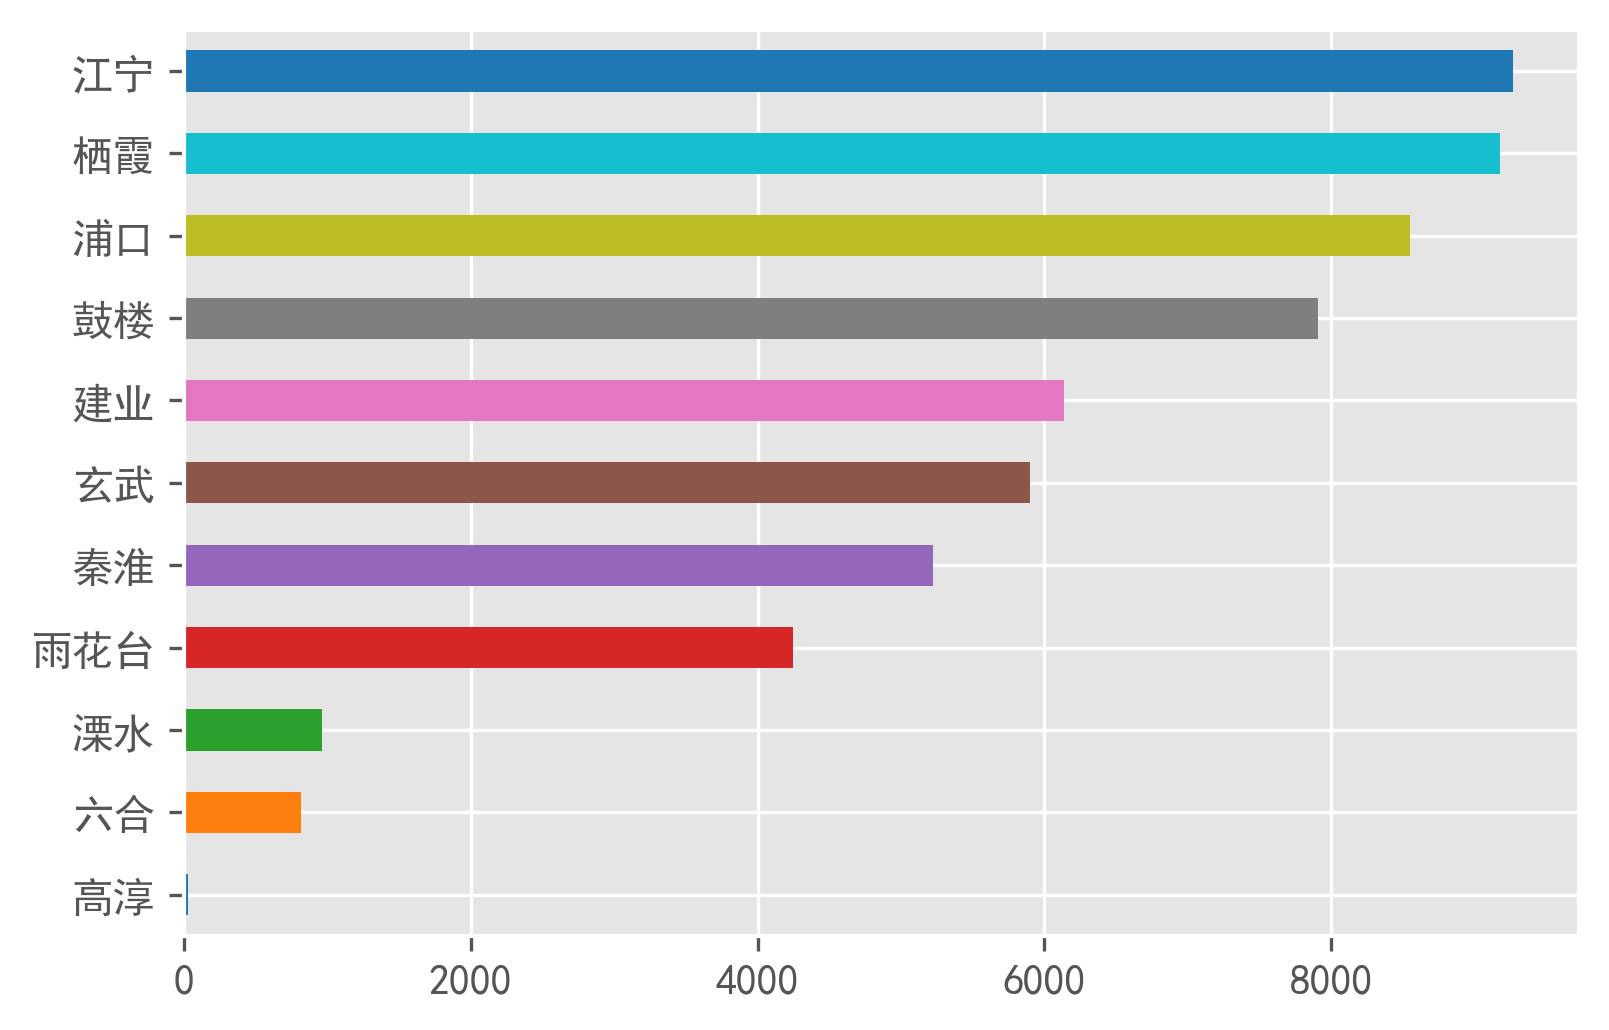

In [32]:
fig = plt.figure(dpi=300)
#tableau参考色系
color =['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
data.dropna(subset=['latitude', 'longitude'])[data['city']=='南京']['dist'].value_counts(ascending=True).plot.barh(colors=color)


d:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
d:\program files\python37\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


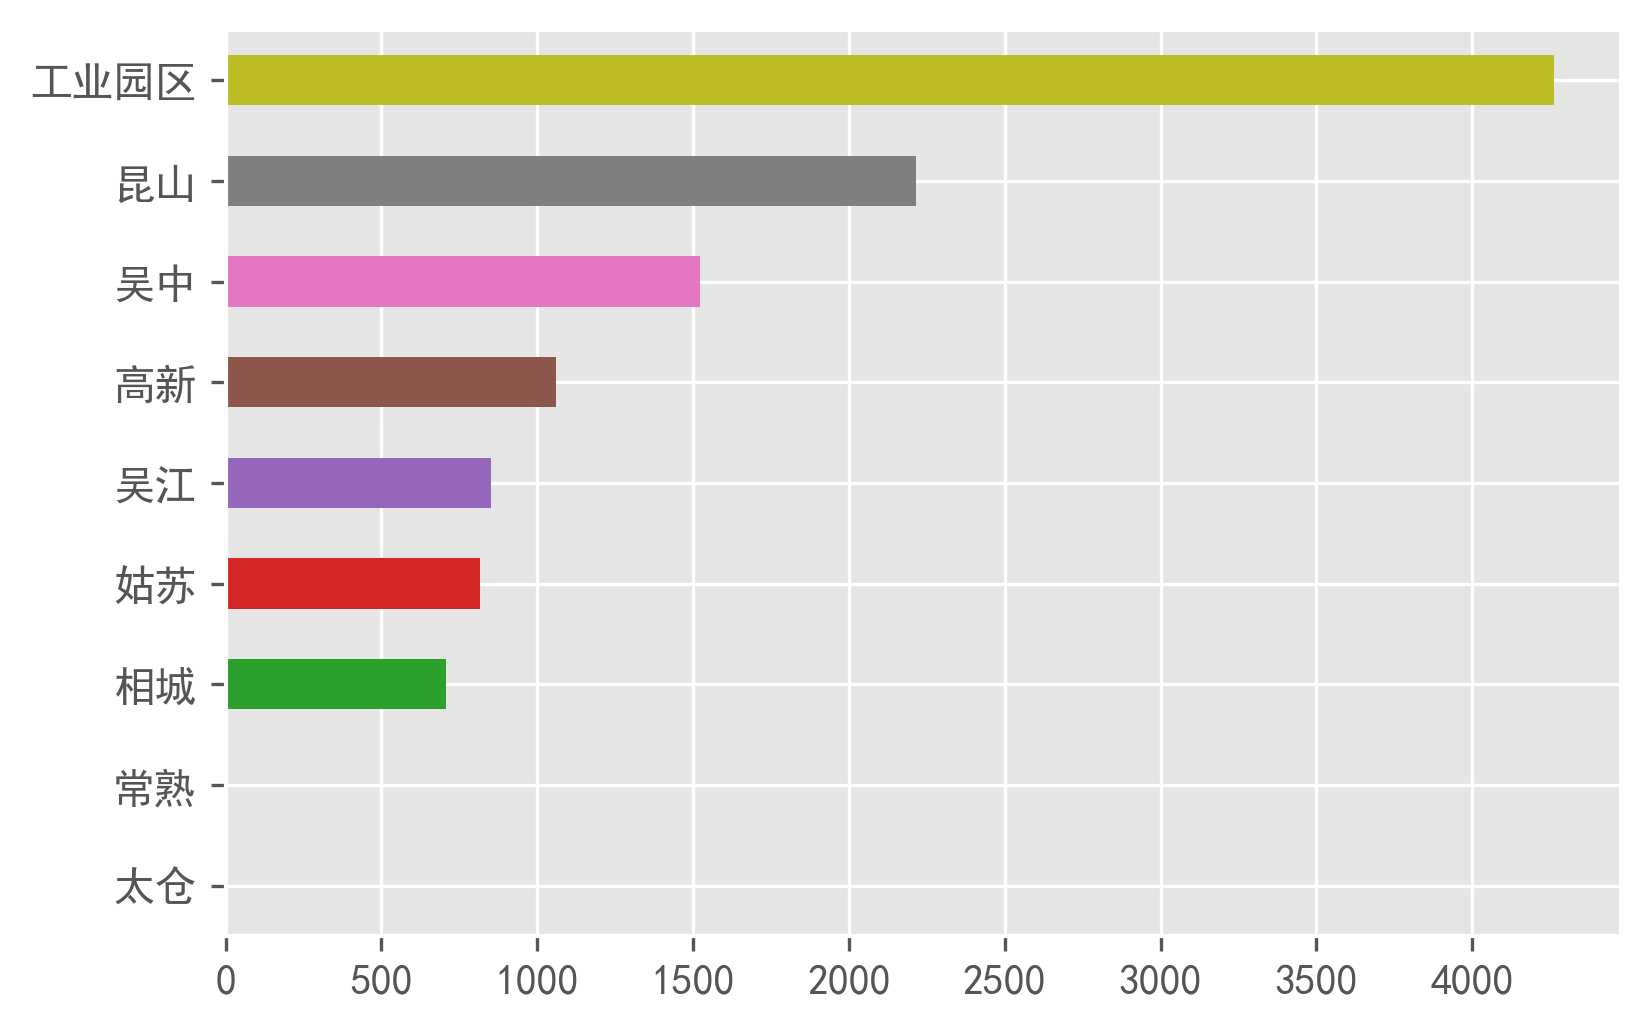

In [33]:
fig = plt.figure(dpi=300)
color =['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
data.dropna(subset=['latitude', 'longitude'])[data['city']=='苏州']['dist'].value_counts(ascending=True).plot.barh(colors=color)

d:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
d:\program files\python37\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


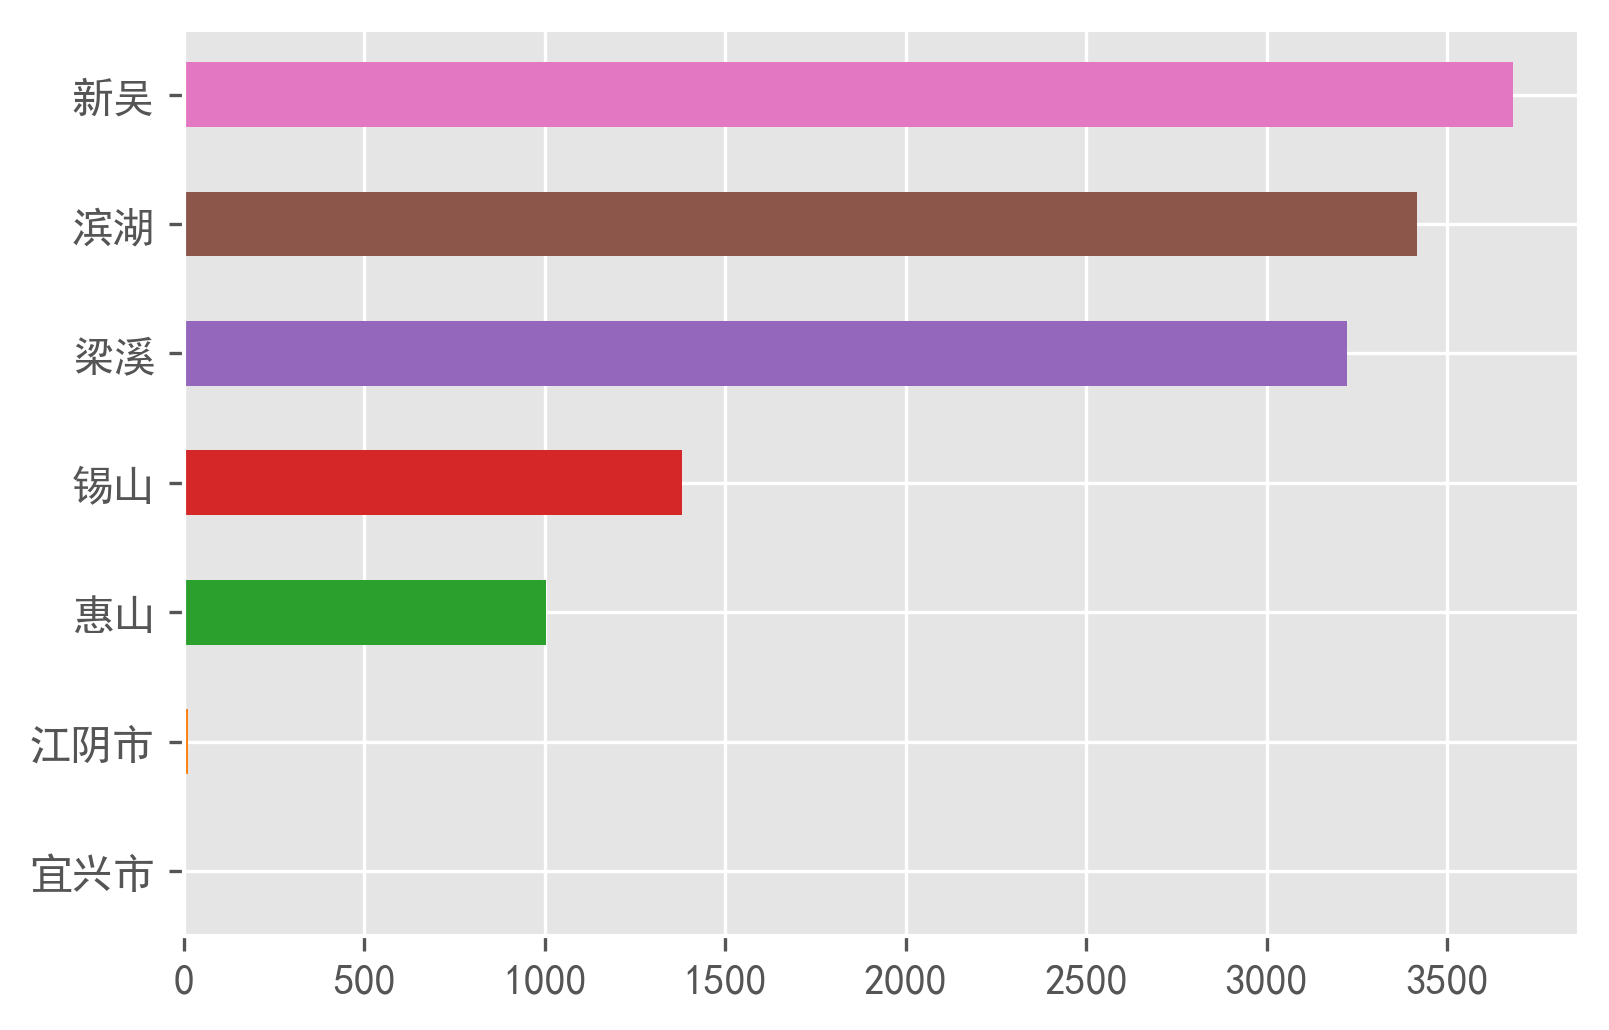

In [34]:
fig = plt.figure(dpi=300)
color =['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
data.dropna(subset=['latitude', 'longitude'])[data['city']=='无锡']['dist'].value_counts(ascending=True).plot.barh(colors=color)

d:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
d:\program files\python37\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


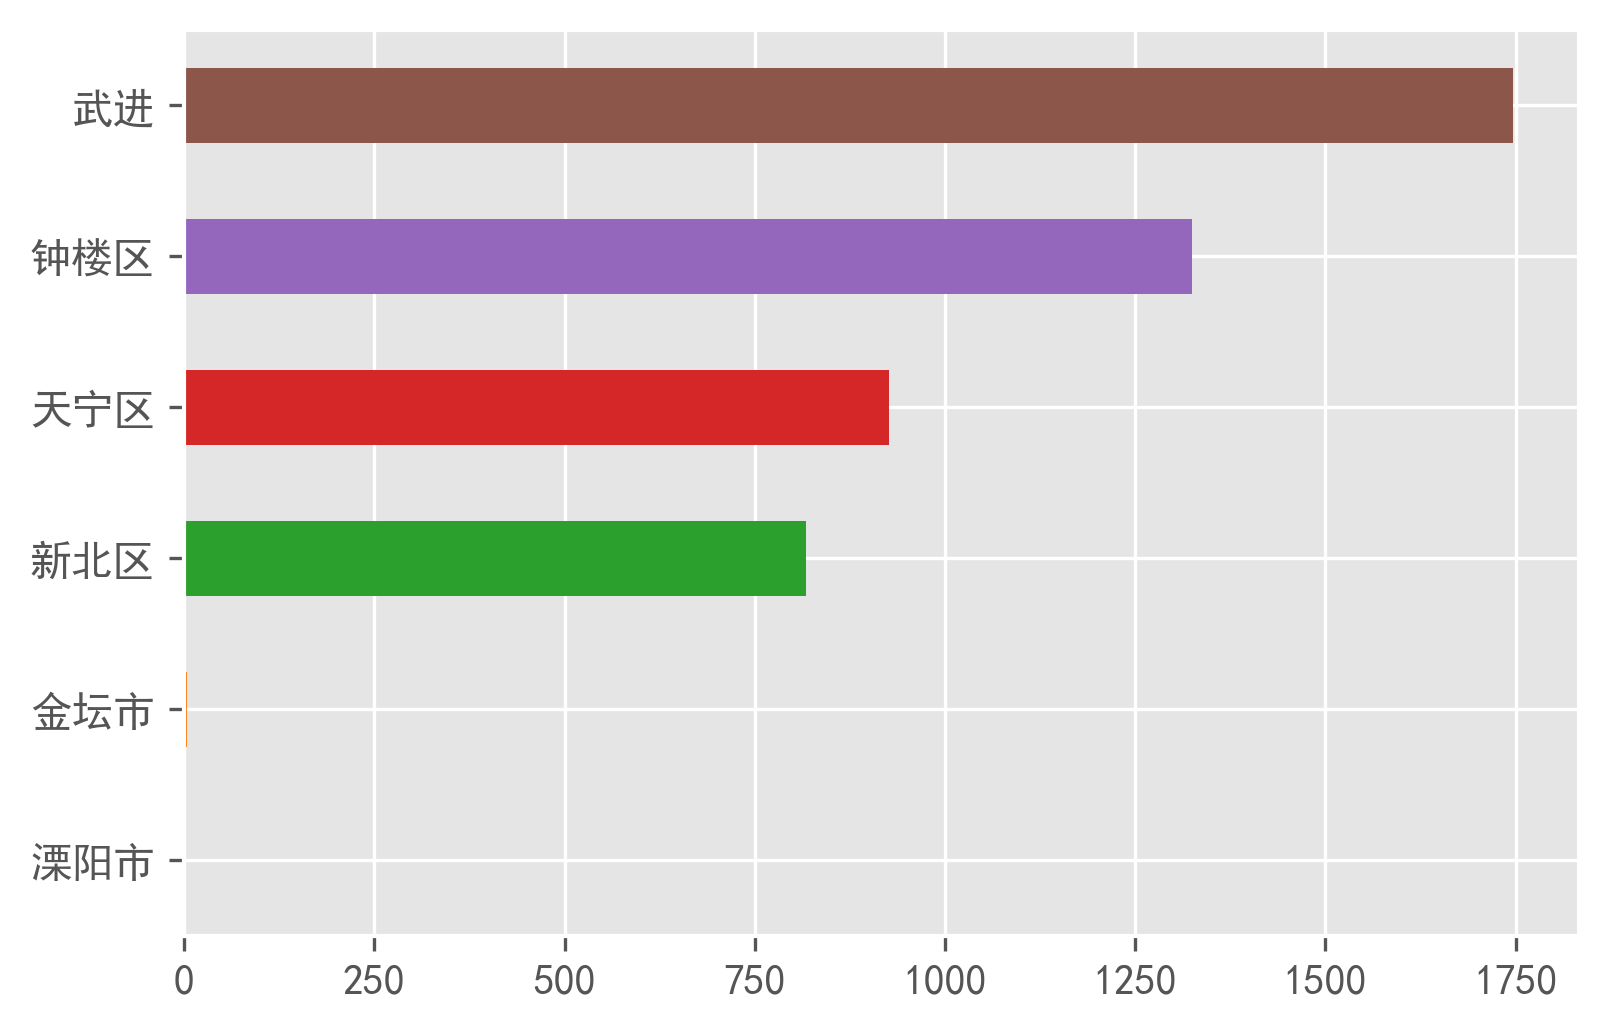

In [35]:
fig = plt.figure(dpi=300)
color =['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
data.dropna(subset=['latitude', 'longitude'])[data['city']=='常州']['dist'].value_counts(ascending=True).plot.barh(colors=color)

### 2. 城市各区域的房价分布怎么样？

In [36]:
data['aver_price'] = np.round(data['rent_price_listing'] / data['rent_area'], 1)

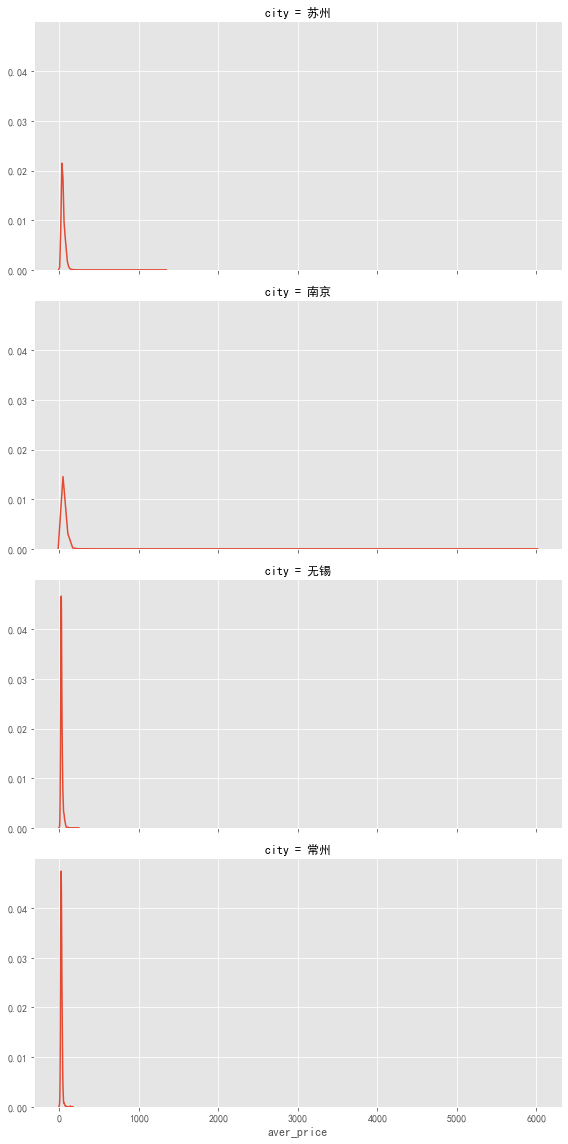

In [37]:
g = sns.FacetGrid(data, row="city", height=4, aspect=2)
g = g.map(sns.kdeplot, "aver_price")

In [38]:
# 由于平均租金基本上都集中在100元/平米/月以内，所以选取这部分数据绘制热力图
def get_city_zf_aver_price(city, city_short, col=['longitude', 'latitude', 'aver_price'], data=data):
    file_name = 'data_' + city_short + '_aver_price.csv'
    data_latlon = data.loc[(data['city']==city)&(data['aver_price']<=100), col].dropna(subset=['latitude', 'longitude'])
    data_latlon['longitude'] = data_latlon['longitude'].astype(str)
    data_latlon['latitude'] = data_latlon['latitude'].astype(str)
    data_latlon['latlon'] = data_latlon['longitude'].str.cat(data_latlon['latitude'], sep=',')
    data_latlon.to_csv(file_name, index=False)
    print(city+'的数据一共有{}条'.format(data_latlon.shape[0]))

In [39]:
get_city_zf_aver_price('南京', 'nj')
get_city_zf_aver_price('苏州', 'sz')
get_city_zf_aver_price('无锡', 'wx')
get_city_zf_aver_price('常州', 'cz')

南京的数据一共有52997条
苏州的数据一共有11091条
无锡的数据一共有12696条
常州的数据一共有4812条


In [40]:
# 各城市租金Top10的商圈
bc_top10 = data.groupby(['city', 'bizcircle_name'])['aver_price'].mean().nlargest(50).reset_index()['city'].value_counts()

In [43]:
#此处pyecharts是0.1.9.4版本
from pyecharts import Bar


bc_top10
bar = Bar("每平米平均租金前50的苏南城市商圈数量")
bar.add("", bc_top10.index, bc_top10.values, is_stack=True,
       xaxis_label_textsize=16, yaxis_label_textsize=16, is_label_show=True)
bar.render('每平米平均租金前50的苏南城市商圈数量.html')

In [44]:
def get_top10_bc(city, data=data):
    top10_bc = data[(data['city']==city)&(data['bizcircle_name']!='')].groupby('bizcircle_name')['aver_price'].mean().nlargest(10)
    bar = Bar(city+"市每平米平均租金Top10的商圈", width=1200)
    bar.add("", top10_bc.index, np.round(top10_bc.values, 0), is_stack=True,
       xaxis_label_textsize=16, yaxis_label_textsize=16, xaxis_rotate=30, is_label_show=True)
    bar.render(city+"市每平米平均租金Top10的商圈"+'.html')
    return bar

In [45]:
# 南京每平米平均租金Top10的商圈
get_top10_bc('南京')

In [46]:
get_top10_bc('苏州')

In [47]:
get_top10_bc('无锡')

In [48]:
# 删除错误信息标记行 洛阳镇位置出错，且数据少，拉高了均价。
data = data.drop(data[data['bizcircle_name'].str.contains('洛阳')].index)
# v = data[data['bizcircle_name'].str.contains('洛阳')].index
# v

In [49]:
#检验是否删除
y = data[data['bizcircle_name'].str.contains('洛阳')]
y

,bedroom_num,hall_num,bathroom_num,rent_area,house_title,resblock_name,bizcircle_name,layout,rent_price_listing,house_tag,frame_orientation,m_url,latitude,longitude,distance,city,dist,type,aver_price


In [50]:
get_top10_bc('常州')

### 3. 距离地铁口远近有什么关系？

In [51]:
from scipy import stats

In [52]:
def distance_price_relation(city, data=data):
    g = sns.jointplot(x="distance", 
                  y="aver_price", 
                  data=data[(data['city']==city)&
                            (data['aver_price']<=350)].dropna(subset=['distance']), 
                  kind="reg",
                 stat_func=stats.pearsonr)
    g.fig.set_dpi(100)
    g.ax_joint.set_xlabel('最近地铁距离', fontweight='bold')
    g.ax_joint.set_ylabel('每平米租金', fontweight='bold')
    return g

d:\program files\python37\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


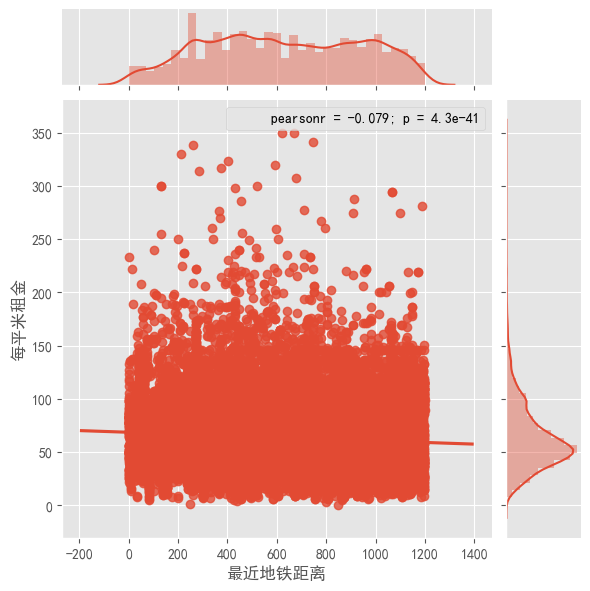

In [53]:
distance_price_relation('南京')

d:\program files\python37\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


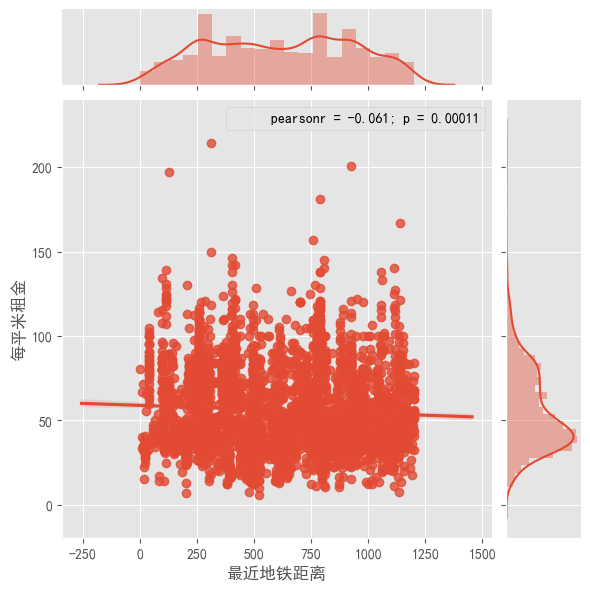

In [54]:
distance_price_relation('苏州')

d:\program files\python37\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


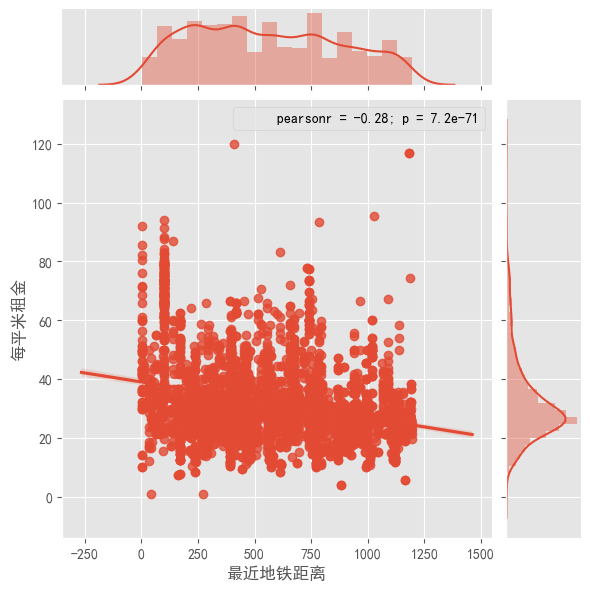

In [55]:
distance_price_relation('无锡')

In [57]:
bins = [100*i for i in range(13)]
data['bin'] = pd.cut(data.dropna(subset=['distance'])['distance'], bins)

In [58]:
bin_nj = data[data['city']=='南京'].groupby('bin')['aver_price'].mean()
bin_sz = data[data['city']=='苏州'].groupby('bin')['aver_price'].mean()
bin_wx = data[data['city']=='无锡'].groupby('bin')['aver_price'].mean()
#bin_cz = data[data['city']=='常州'].groupby('bin')['aver_price'].mean()

In [59]:
from pyecharts import Line


line = Line("距离地铁远近跟每平米租金均价的关系")
for city, bin_data in {'南京':bin_nj, '苏州':bin_sz, '无锡':bin_wx}.items():
    line.add(city, bin_data.index, bin_data.values,
            legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
             xaxis_rotate=20, yaxis_min=8, legend_top=30)
line.render('宁苏锡距离地铁远近跟每平米租金均价的关系.html')

In [60]:
134.6-117

17.599999999999994

### 4. 房屋大小对每平米租金的影响如何？

In [61]:
def area_price_relation(city, data=data):
    fig = plt.figure(dpi=100)
    g = sns.lineplot(x="rent_area",
                     y="aver_price",
                     data=data[(data['city']==city)&(data['rent_area']<150)],
                     ci=None)
    g.set_xlabel('面积', fontweight='bold')
    g.set_ylabel('每平米均价', fontweight='bold')
    return g

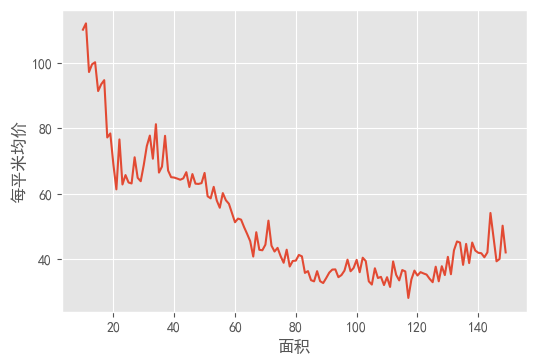

In [62]:
area_price_relation('南京')

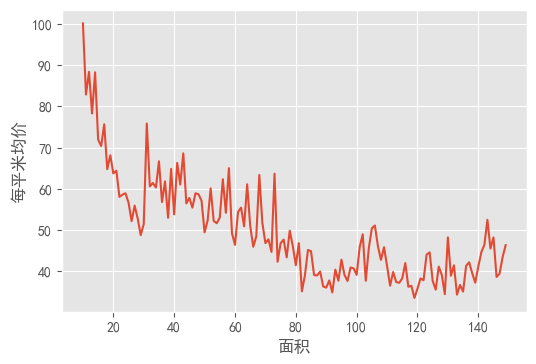

In [63]:
area_price_relation('苏州')

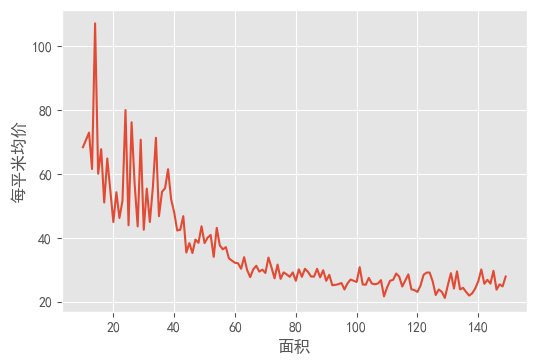

In [64]:
area_price_relation('无锡')

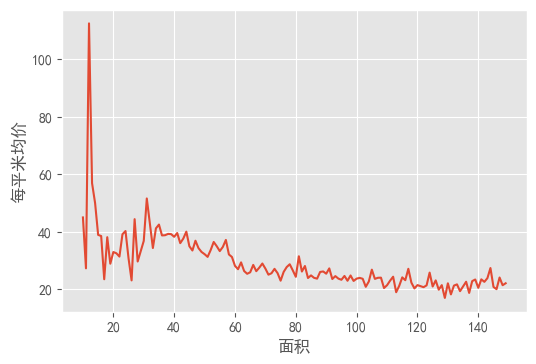

In [65]:
area_price_relation('常州')

In [66]:
# 根据house_title和house_tag再造一个字段：is_dep，也就是“是否是公寓”
data['is_dep'] = (data['house_title'].str.contains('公寓') + data['house_tag'].str.contains('公寓')) > 0

In [67]:
# 每个城市房源的公寓占比
for city in ['南京', '苏州', '无锡', '常州']:
    print(city+'的公寓占总房源量比重为:{}%。'.format(
        np.round(data[data['city']==city]['is_dep'].mean()*100, 2)))

南京的公寓占总房源量比重为:21.11%。
苏州的公寓占总房源量比重为:18.27%。
无锡的公寓占总房源量比重为:2.02%。
常州的公寓占总房源量比重为:2.2%。


In [68]:
data[(data['city']=='无锡')&
    (data['rent_area']>0)&
    (data['rent_area']<60)&
    (data['aver_price']>100)]['is_dep'].mean()

0.2727272727272727

### 5. 租个人房源好还是公寓好？

In [69]:
is_dep = data[(data['city'].isin(['南京','苏州']))&
             (data['is_dep']==1)].groupby('city')['aver_price'].mean()
not_dep = data[(data['city'].isin(['南京','苏州']))&
             (data['is_dep']==0)].groupby('city')['aver_price'].mean()

In [70]:
bar = Bar("个人房源和公寓的每平米租金差别", width=600)
bar.add("个人房源", not_dep.index, np.round(not_dep.values, 0), 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar.add("公寓", is_dep.index, np.round(is_dep.values, 0),
       legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar.render('个人房源和公寓的每平米租金差别'+'.html')

### 5. 精装和简装对房子价格的影响

In [71]:
data['decorated'] = data[data['house_tag'].notna()]['house_tag'].str.contains('精装')

In [72]:
decorated = data[data['decorated']==1].groupby('city')['aver_price'].mean()

In [73]:
not_decorated = data[data['decorated']==0].groupby('city')['aver_price'].mean()

In [74]:
bar = Bar("各城市精装和简装的每平米租金差别", width=600)
bar.add("精装(刷过墙)", decorated.index, np.round(decorated.values, 0), 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar.add("简装(破房子)", not_decorated.index, np.round(not_decorated.values, 0),
       legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar.render("各城市精装和简装的每平米租金差别"+'.html')

In [75]:
is_dec_dep = data[(data['decorated']==1)&
                  (data['is_dep']==1)&
                 (data['city'].isin(['南京', '苏州']))].groupby('city')['aver_price'].mean()

In [76]:
is_dec_not_dep = data[(data['decorated']==1)&
                      (data['is_dep']==0)&
                     (data['city'].isin(['南京', '苏州']))].groupby('city')['aver_price'].mean()

In [77]:
not_dec_dep = data[(data['decorated']==0)&
                   (data['is_dep']==0)&
                  (data['city'].isin(['南京', '苏州']))].groupby('city')['aver_price'].mean()

In [78]:
bar = Bar("各城市装修和房源类型的每平米租金差别", width=600)
bar.add("精装公寓", is_dec_dep.index, np.round(is_dec_dep.values, 0), 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar.add("精装个人房源", is_dec_not_dep.index, np.round(is_dec_not_dep.values, 0),
       legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar.add("简装个人房源", not_dec_dep.index, np.round(not_dec_dep.values, 0),
       legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar.render('各城市装修和房源类型的每平米租金差别.html')

### 7. 北方集中供暖对价格的影响

In [79]:
data['ct_heating'] = data['house_tag'].str.contains('集中供暖')

In [80]:
data[data['city']=='南京'].groupby('ct_heating')['aver_price'].mean()

ct_heating
False    61.798896
Name: aver_price, dtype: float64

### 8. 各城市房屋租售比

In [81]:
zs_ratio = [28866, 18787, 12411, 14000]/(data.groupby('city')['rent_price_listing'].sum()/data.groupby('city')['rent_area'].sum())/12

In [82]:
bar = Bar("各城市房屋租售比(租多少年可以在该城市买下一套房)", width=450)
bar.add("", zs_ratio.index, np.round(zs_ratio.values, 0), 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True, label_color='black')
bar.render('各城市房屋租售比(租多少年可以在该城市买下一套房).html')

### 9. 苏南城市租房时都看重什么？

In [83]:
def layout_top3(city, data):
    layout_data = data[data['city']==city]['layout'].value_counts().nlargest(3)
    bar = Bar(city+"最受欢迎的户型", width=600)
    bar.add("", layout_data.index, layout_data.values, 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True,colors=['red','green','blue'])
    bar.render(city+"最受欢迎的户型"+'.html')
    return bar

In [84]:
layout_top3('南京', data)

In [85]:
layout_top3('苏州', data)

In [86]:
layout_top3('无锡', data)

In [87]:
layout_top3('常州', data)

In [89]:
#升级pyecharts 1.4.0版本的词云好用
from pyecharts.charts import WordCloud
import jieba
    
def cut(text):
    counts = {}
    wordsList =jieba.lcut(str(text))
    for word in wordsList:
        word = word.replace("，", "").replace("！", "").replace("“", "") \
            .replace("”", "").replace("。", "").replace("？", "").replace("：", "") \
            .replace("...", "").replace("、", "").strip(' ').strip('\r\n')
        if len(word) == 1 or word == "":
            continue
        else:
            counts[word]=counts.get(word,0)+1 #单词计数
    items = list(counts.items()) #将字典转为list
    items.sort(key=lambda x:x[1],reverse=True) #根据单词出现次数降序排序
        #打印前15个
    return items
#     for i in range(15):
#         word,counter = items[i]
#         print("单词：{},次数：{}".format(word,counter))

ImportError: cannot import name 'WordCloud' from 'pyecharts.charts' (d:\program files\python37\lib\site-packages\pyecharts\charts\__init__.py)

In [ ]:
##词云示例
nj_tag = []
for st in data[data['city']=='南京'].dropna(subset=['house_tag'])['house_tag']:
    nj_tag.extend(st.split(' '))
  
nj = cut(nj_tag)
    
wordcloud = WordCloud()
wordcloud.add("", nj, word_size_range=[20, 100])
wordcloud.render('南京词云.html')

In [ ]:
sz_tag = []
for st in data[data['city']=='苏州'].dropna(subset=['house_tag'])['house_tag']:
    sz_tag.extend(st.split(' '))

sz = cut(sz_tag)
wordcloud = WordCloud()
wordcloud.add("", sz, word_size_range=[20, 100])
wordcloud.render('苏州词云.html')

In [ ]:
wx_tag = []
for st in data[data['city']=='无锡'].dropna(subset=['house_tag'])['house_tag']:
    wx_tag.extend(st.split(' '))

wx = cut(wx_tag)
wordcloud = WordCloud()
wordcloud.add("", wx, word_size_range=[20, 100])
wordcloud.render('无锡词云.html')

In [ ]:
cz_tag = []
for st in data[data['city']=='常州'].dropna(subset=['house_tag'])['house_tag']:
    cz_tag.extend(st.split(' '))

cz = cut(cz_tag)
wordcloud = WordCloud()
wordcloud.add("", cz, word_size_range=[20, 100])
wordcloud.render('常州词云.html')